In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as py
import scipy.stats as stat

## Assumptions

1- Linear Realtionship (Linearity)

2- No Multicollinearity

3- No Autocorrelation

4- Normal distr. of error terms (Residuals Normality)

5- Mean of residuals is zero

6- Homoscedasticity

### 1. Linear Realtionship (Linearity)

The relationship between the independent(y) and dependent(x) variables to be linear.

In [2]:
x1=[2,4,6,8,10,12,14,16,18,20]
y1=[5,10,12,15,16,20,25,30,35,42]

Text(0.5, 1.0, 'Positive Relation')

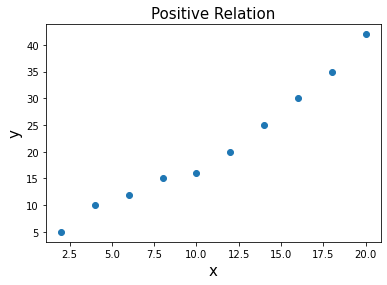

In [3]:
plt.scatter(x1,y1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Positive Relation',fontsize=15)

In [4]:
x2=[2,4,6,8,10,12,14,16,18,20]
y2=y1[::-1]

Text(0.5, 1.0, 'Negative Relation')

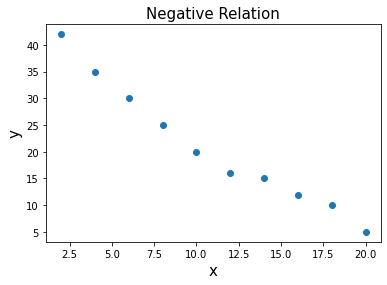

In [5]:
plt.scatter(x2,y2)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Negative Relation',fontsize=15)

What if our data is not have linear relationship?, i.e our data is not normally distributed

Foll. tech. used to tranform the data into nornmal distribution
- logarithmic tranformation
- reciprocal tranformation
- sq-root tranformation
- exponential tranformation

### Log Transform ( Non-linear to linear)

In [6]:
x3=[2307.23,2290.87,23.44,5285.55,562.34,6.44,1.77,19.02,199.53,144.82,363.08,131.58,6014.25,316.23,12.57,128.82,1412.54,5.41,516.52,1.70]
y3=[3.46,3.36,1.37,3.82,2.75,0.73,0.17,1.20,2.30,2.06,2.56,2.04,3.70,2.50,1.02,2.11,3.15,0.83,2.81,0.23]

<AxesSubplot:ylabel='Count'>

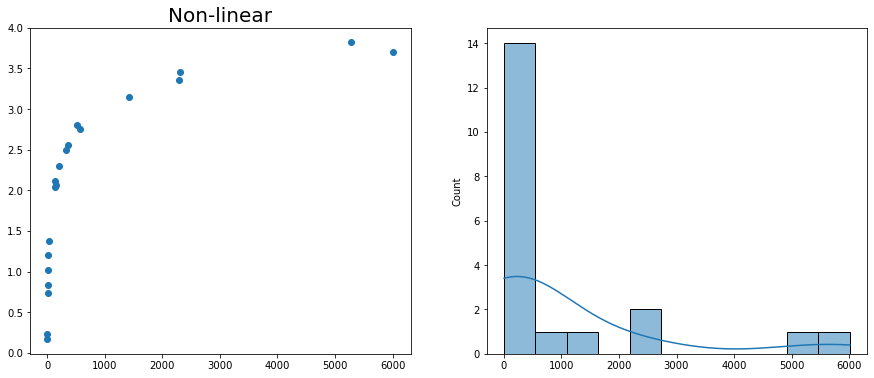

In [7]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(x3,y3)
plt.title('Non-linear', fontsize=20)
plt.subplot(1,2,2)
sns.histplot(x3, kde=True)

In [8]:
x3

[2307.23,
 2290.87,
 23.44,
 5285.55,
 562.34,
 6.44,
 1.77,
 19.02,
 199.53,
 144.82,
 363.08,
 131.58,
 6014.25,
 316.23,
 12.57,
 128.82,
 1412.54,
 5.41,
 516.52,
 1.7]

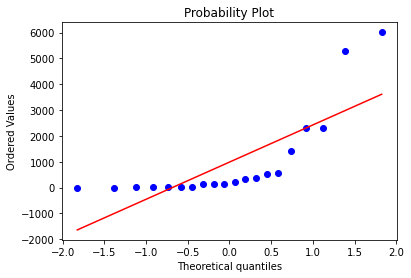

In [9]:
stat.probplot(x3, dist='norm', plot=py)
py.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:

lr=LinearRegression()

x3=np.array(x3).reshape(-1,1)
y3=np.array(y3).reshape(-1,1)
lr.fit(x3,y3)

lr.score(x3, y3)

0.5110527809066143

In [11]:
x3_tran=np.log(x3)
x3_tran

array([[7.74380295],
       [7.73668694],
       [3.15444396],
       [8.57273196],
       [6.33210665],
       [1.86252854],
       [0.57097955],
       [2.94549106],
       [5.2959646 ],
       [4.97549159],
       [5.8946232 ],
       [4.87961503],
       [8.70188693],
       [5.7564698 ],
       [2.53131302],
       [4.85841608],
       [7.25314478],
       [1.68824909],
       [6.24711401],
       [0.53062825]])

<AxesSubplot:ylabel='Count'>

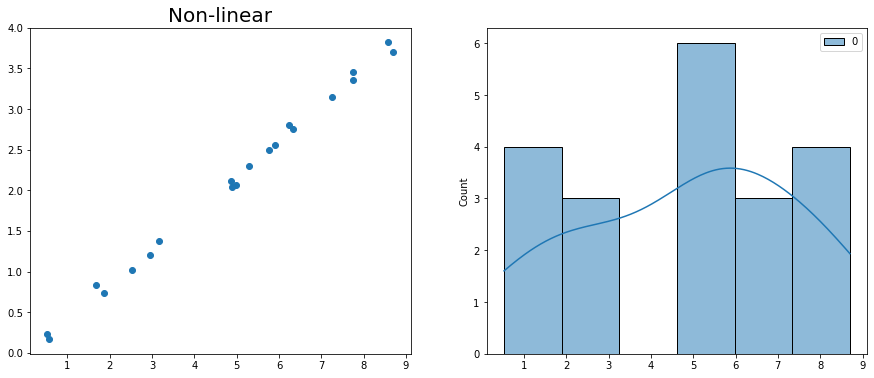

In [12]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(x3_tran,y3)
plt.title('Non-linear', fontsize=20)
plt.subplot(1,2,2)
sns.histplot(x3_tran, kde=True)

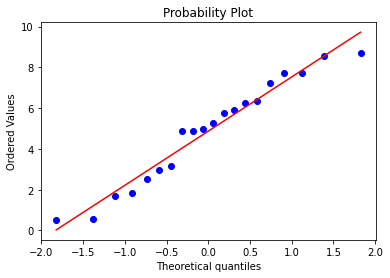

In [22]:
c=x3_tran.flatten()
stat.probplot(c, dist='norm', plot=py)
py.show()

In [23]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()

x_tran=np.array(x3_tran).reshape(-1,1)
lr1.fit(x3_tran,y3)

lr1.score(x3_tran, y3)

0.9969795159486744

In [24]:
lr1.predict(x3_tran)

array([[3.37802544],
       [3.37487466],
       [1.34598363],
       [3.74505238],
       [2.75296518],
       [0.77395904],
       [0.20209671],
       [1.25346503],
       [2.29419001],
       [2.15229338],
       [2.55925955],
       [2.10984188],
       [3.80223865],
       [2.49808903],
       [1.0700784 ],
       [2.10045557],
       [3.16077551],
       [0.6967929 ],
       [2.71533278],
       [0.18423026]])

In [25]:
y3

array([[3.46],
       [3.36],
       [1.37],
       [3.82],
       [2.75],
       [0.73],
       [0.17],
       [1.2 ],
       [2.3 ],
       [2.06],
       [2.56],
       [2.04],
       [3.7 ],
       [2.5 ],
       [1.02],
       [2.11],
       [3.15],
       [0.83],
       [2.81],
       [0.23]])

### No Multicollinearity
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model

In [29]:
df=pd.read_csv('D:\Data_sets\Advertising.csv', usecols=['TV','radio','newspaper','sales'])
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [35]:
X=df.drop('sales', axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [34]:
y=df['sales']

In [36]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [52]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                   2.43e-171
Time:                        22:32:13   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model.predict(X)

0      21.941397
1      11.885691
2      12.290830
3      18.311216
4      13.107703
         ...    
195     3.109157
196     6.292321
197    11.695501
198    25.702168
199    14.542552
Length: 200, dtype: float64

In [55]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [58]:
df_salary=pd.read_csv('D:\Data_sets\Salary_data.csv')
df_salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [59]:
X=df_salary.drop('Salary', axis=1)
X.head()

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2


In [60]:
y=df_salary['Salary']

In [61]:
X.head()

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2


In [62]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [63]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3108.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                    1.33e-33
Time:                        22:51:47   Log-Likelihood:                         -300.40
No. Observations:                  30   AIC:                                      604.8
Df Residuals:                      28   BIC:                                      607.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  6814.1911    570.150     11.952      0.000    5646.291    7982.091
Age              1462.7324    123.591     11.835      0.000    1209.568    1715.897
==============================================================================
Omnibus:                        2.685   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.970
Skew:                           0.455   Prob(JB):                        0.373
Kurtosis:                       2.135   Cond. No.                         16.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
df_salary.corr()

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


In [74]:
X=df_salary.drop(['YearsExperience','Salary'], axis=1)
X.head()

,Age
0,21.0
1,21.5
2,21.7
3,22.0
4,22.2


In [75]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1031.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                    3.25e-24
Time:                        22:59:33   Log-Likelihood:                         -327.52
No. Observations:                  30   AIC:                                      657.0
Df Residuals:                      29   BIC:                                      658.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         2872.6001     89.472     32.106      0.000    2689.608    3055.592
==============================================================================
Omnibus:                        5.232   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                1.793
Skew:                           0.057   Prob(JB):                        0.408
Kurtosis:                       1.808   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model.predict([1,2])

array([2872.60013403, 5745.20026806])

In [77]:
2872.60013403*2

5745.20026806

### 3- No Autocorrelation

In [180]:
x=np.arange(1,31)

In [181]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [182]:
y=[20.8,23.5,22.4,21.9,22.5,24.9,23.02,24.3,25,26.4,28.7,30.4,32.7,33.1,34.5,33.4,35.8,33.9,
   36.1,38.4,39.2,41.0,42.7,44.2,43.8,45.4,43.8,47.2,47.5,48.1]

In [183]:
len(y)

30

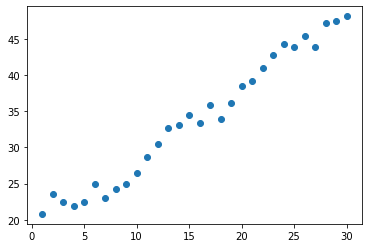

In [184]:
plt.scatter(x,y)

In [185]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [186]:
lr2=LinearRegression()

In [187]:
lr2.fit(x,y)

LinearRegression()

In [188]:
y_pre=lr2.predict(x)

In [189]:
residuals1=y-y_pre

### Durbin Waston Test

dwt = 2   no autocorrelation

0 < dwt < 2 +ve autocorrelation

2 < dwt < 4 -ve autocorrelation

In [190]:
from statsmodels.stats.stattools import durbin_watson

In [191]:
dwt=durbin_watson(residuals1)

In [192]:
dwt

array([1.05979351])

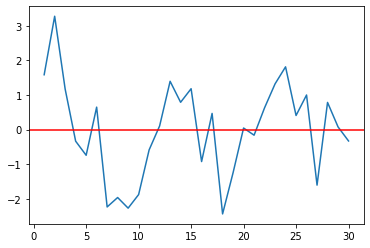

In [193]:
plt.plot(x,residuals1)
plt.axhline(y = 0, color = 'r', linestyle = '-')

### 4- Normal distr. of error terms (Residuals Normality)

In [194]:
X=df_salary.drop(['Age','Salary'], axis=1)

In [195]:
y=df_salary['Salary']

In [196]:
lr3=LinearRegression()

In [197]:
lr3.fit(X,y)

LinearRegression()

In [198]:
y_predict=lr3.predict(X)

In [201]:
residuals2=y-y_predict

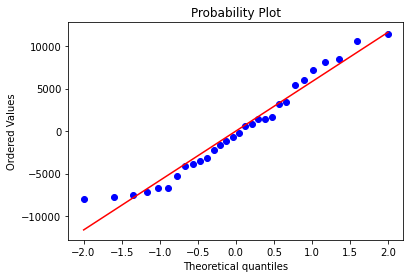

In [202]:
stat.probplot(residuals2, dist='norm', plot=py)
py.show()

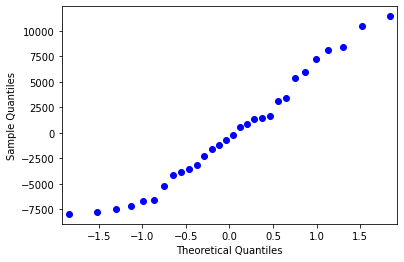

In [203]:
sm.qqplot(residuals2)
py.show()

In [207]:
residuals2>0

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25    False
26     True
27    False
28    False
29    False
Name: Salary, dtype: bool

###  5. Mean of residuals is zero

In [205]:
np.mean(residuals2)

-7.275957614183426e-13

In [206]:
round(np.mean(residuals),2)

-0.0

### 6. No Heteroscedasticity

In [240]:
x4=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]
y4=[5,15,6,15,20,35,25,30,35,45,40,50,65,70,60,100,110]

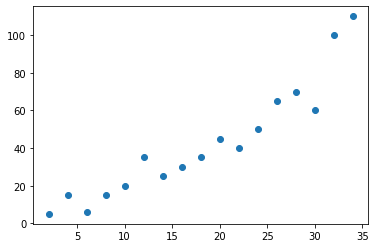

In [241]:
plt.scatter(x4,y4)

In [242]:
lr4=LinearRegression()

In [246]:
x4=np.array(x4).reshape(-1,1)
y4=np.array(y4).reshape(-1,1)
lr4.fit(x4,y4)

LinearRegression()

In [247]:
predict4=lr4.predict(x4)

In [248]:
residuals4=y4-predict4

Text(0, 0.5, 'Residual')

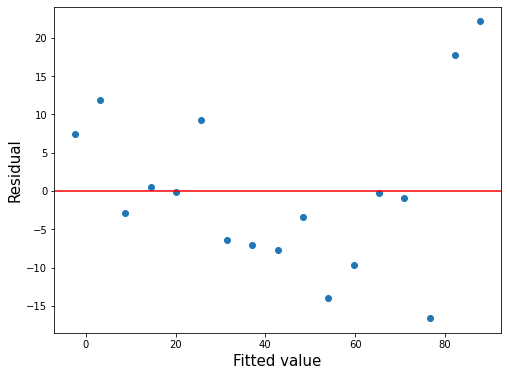

In [249]:
plt.figure(figsize = (8,6))
plt.scatter(predict4, residuals4)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel("Fitted value", fontsize=15)
plt.ylabel("Residual", fontsize=15)

In [267]:
x5=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]
y5=[5,10,15,22,25,32,38,43,45,53,54,61,66,71,78,83,89]

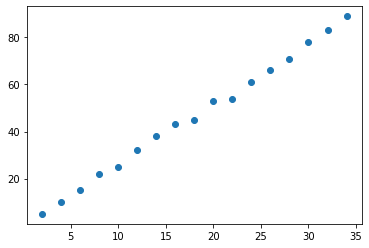

In [268]:
plt.scatter(x5,y5)

In [269]:
#residuals = (Y-regression_line)
fitted_value= y_pre

In [270]:
lr5=LinearRegression()

In [271]:
x5=np.array(x5).reshape(-1,1)
y5=np.array(y5).reshape(-1,1)
lr5.fit(x5,y5)

LinearRegression()

In [272]:
predict5=lr5.predict(x5)

In [273]:
residuals5=y5-predict5

Text(0, 0.5, 'Residual')

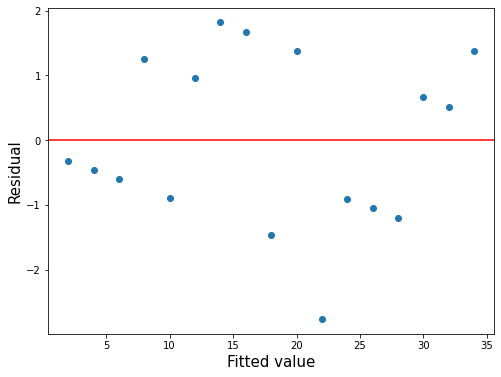

In [277]:
plt.figure(figsize = (8,6))
plt.scatter(x5, residuals5)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel("Fitted value", fontsize=15)
plt.ylabel("Residual", fontsize=15)

Text(0, 0.5, 'Residual')

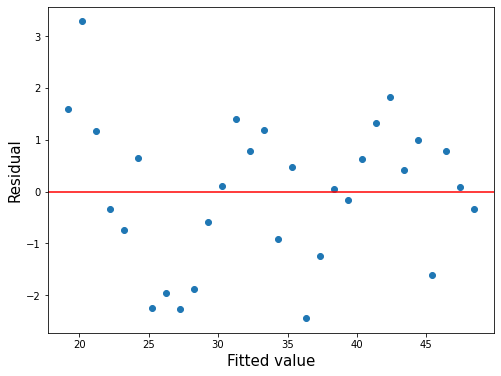

In [128]:
plt.figure(figsize = (8,6))
plt.scatter(fitted_value, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel("Fitted value", fontsize=15)
plt.ylabel("Residual", fontsize=15)

In [3]:
df=pd.read_csv('D:\Data_sets\moscow_apartment_listings.csv')

In [4]:
df.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  int64  
 2   year_built_empty       12181 non-null  int64  
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  int64  
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  float64
 7   lat                    12181 non-null  float64
 8   lon                    12181 non-null  float64
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

In [16]:
X=df.drop(['price','AO','hm', 'h3'], axis=1)

In [17]:
y=df['price']

In [18]:
lr6=LinearRegression()

In [19]:
lr6.fit(X,y)

LinearRegression()

In [26]:
lr6.score(X,y)

0.7997155878113642

In [27]:
predicted6=y-lr6.predict(X)

In [28]:
residuals6=y-predicted6

Text(0, 0.5, 'Residual')

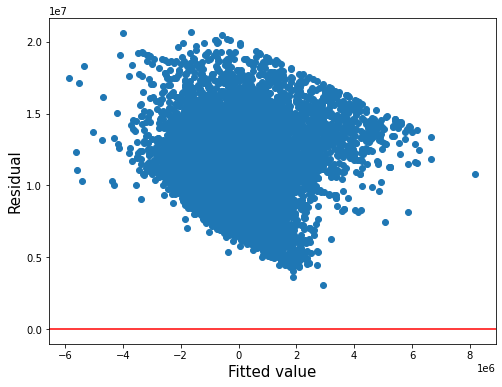

In [33]:
plt.figure(figsize = (8,6))
plt.scatter(predicted6, residuals6)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel("Fitted value", fontsize=15)
plt.ylabel("Residual", fontsize=15)